In [82]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [83]:
import matplotlib.pyplot as plt

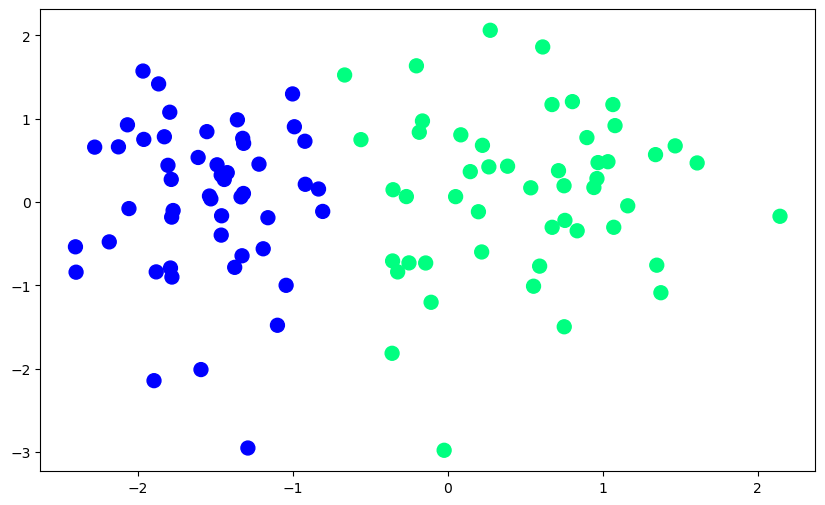

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [85]:
#Perceptron trick implementation from scratch
def step(z):
    return 1 if z>=0 else 0

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1) #bias term
    weights=np.ones(X.shape[1])
    learning_rate=0.1
    epochs=1000

    for epoch in range(epochs):
        j=np.random.randint(0,len(X)) #randomly select an index
        y_hat=step(np.dot(X[j],weights)) #prediction
        error=y[j]-y_hat
        weights=weights + learning_rate*error*X[j] #weight update

    return weights[0], weights[1:] #return bias and weights
    

In [86]:
bias, weights = perceptron(X,y)
print("Bias:", bias)
print("Weights:", weights)

Bias: 0.9
Weights: [1.32584342 0.21156437]


In [87]:
m = -(weights[0]/weights[1]) #slope of the line Ax + By + C = 0 m = -A/B
b = -(bias/weights[1]) #y-intercept b = -C/B

In [88]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


(-3.0, 3.0)

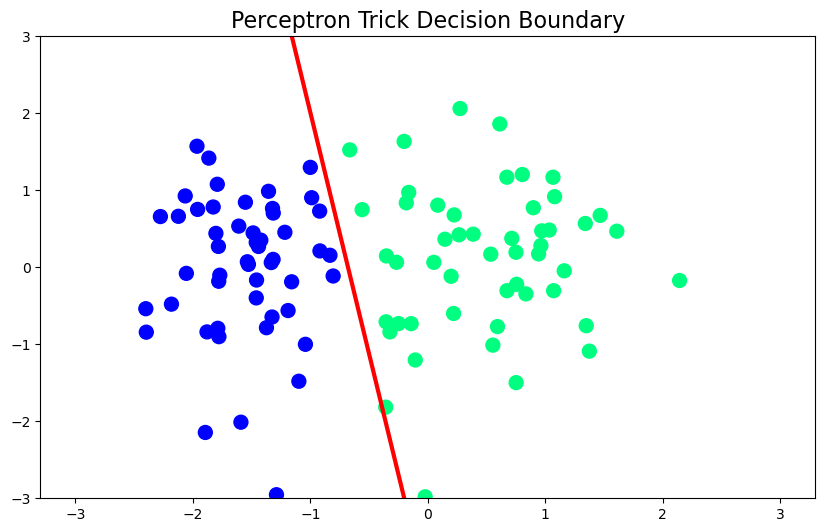

In [89]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.title("Perceptron Trick Decision Boundary",fontsize=16)
plt.ylim(-3,3)